In [1]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from functools import partial

import tensorflow as tf
AUTO = tf.data.experimental.AUTOTUNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# image to rgb

def img_decoder(path, label=None):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [84, 84])
    img = tf.cast(img, tf.float32) / 255.0
    if label == None:
        return img
    return img, label

In [3]:
images = glob('.\\Topic_5_Data\\ISIC84by84\\train\\*\\*.jpg')
df = pd.DataFrame({'path': images})
df['label'] = df['path'].str.split('\\', expand=True)[4]
# class_names=['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']
# dict_classes={0:'AK', 1:'BCC', 2:'BKL',3:'DF',4:'NV',5:'VASC',6:'MEL',7:'SCC'}
# dict_classes={'AK':0,'BCC':1,'BKL':2,'DF':3,'NV':4,'VASC':5,'MEL':6,'SCC':7}
dict_classes={'AK':0,'BCC':1,'BKL':2,'DF':3,'NV':5,'VASC':7,'MEL':4,'SCC':6}
labels=df['label'].values
bin=[]
for label in labels:
    bin.append(dict_classes[label])
df['bin']=bin
df.head()

,path,label,bin
0,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002446...,AK,0
1,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002447...,AK,0
2,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002451...,AK,0
3,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002464...,AK,0
4,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002465...,AK,0


[12775  4422  3223  2524   735   528   153   139]
Index(['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF'], dtype='object')


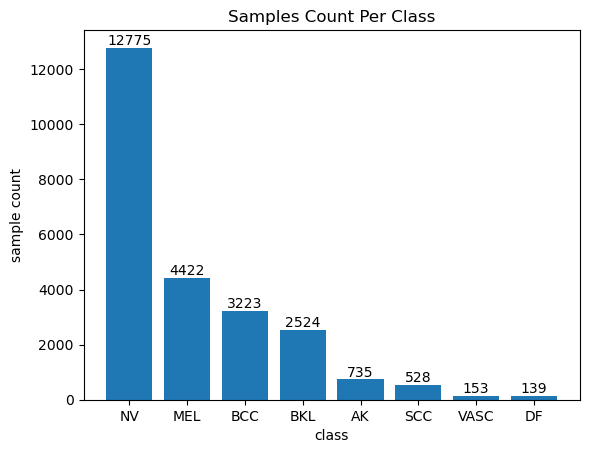

In [4]:
# visualization of classes images count

x = df['label'].value_counts()
print(x.values)
print(x.index)
fig, ax = plt.subplots()
plt.bar(x.index, x.values, width=0.8)
plt.title('Samples Count Per Class')
plt.xlabel('class')
plt.ylabel('sample count')
plt.bar_label(ax.containers[0], labels=x.values)
plt.show()

In [5]:
print(df.shape)
file_name = 'dataset.csv'
df.to_csv(file_name, sep=',', encoding='utf-8', index=False) 


(24499, 3)


In [6]:
# remove duplicates from df['path']

# importing the module
# import copy
import json

df_dup = df.copy()

# Opening JSON file
with open('.\\duplicates\\summary_low_res.json') as json_file:
    summary_low_res = json.load(json_file)

root_path = '.\\Topic_5_Data\\ISIC84by84\\train\\'

for key in summary_low_res.keys():
    print(key)
    if summary_low_res[key]:
        for file_ in summary_low_res[key]:
            file_name = (file_).split('\\')[4]
            print(file_name)
            path_ = f'{root_path}{key}\\{file_name}'
            print(path_)
            ind_ = df_dup[df_dup['path']==path_].index
            print(ind_)
            df_dup.drop(ind_, inplace=True)
    print(df_dup.shape)

# df_dup.shape
df.to_csv('df_dup.csv', sep=',', encoding='utf-8', index=False) 
    


AK
ISIC_0053738.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0053738.jpg
Int64Index([135], dtype='int64')
ISIC_0057051.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0057051.jpg
Int64Index([230], dtype='int64')
ISIC_0057477.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0057477.jpg
Int64Index([248], dtype='int64')
ISIC_0060116.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0060116.jpg
Int64Index([333], dtype='int64')
ISIC_0061121.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0061121.jpg
Int64Index([364], dtype='int64')
ISIC_0067799.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0067799.jpg
Int64Index([578], dtype='int64')
(24493, 3)
BCC
ISIC_0054074.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0054074.jpg
Int64Index([1305], dtype='int64')
ISIC_0054075.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0054075.jpg
Int64Index([1306], dtype='int64')
ISIC_0054113.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0054113.jpg
Int64Index([1308], dtype='int64')
ISIC_0054986.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_

In [7]:
# replace path of black background images with resized images path

df_blk = df_dup.copy()
root_path = '.\\Topic_5_Data\\ISIC84by84\\train\\'
list_files = glob('.\\black_resize\\*.json')
print(list_files)
# Opening JSON file
for class_file in list_files:
    with open(class_file) as json_file:
        class_ = json.load(json_file)
    # print(class_)
    key, values = list(class_.items())[0]
    # print(key, values)
    print(key)
    print(len(values[0]))
    if values[0]:
        for i in range(len(values[0])):
            # print(key)
            # print(values[0])
            # print(values[1])
            file_name = (values[0][i]).split('\\')
            # print(len(file_name))
            file_name = file_name[len(file_name)-1]
            # print('org_file_name',file_name)
            path_ = f'{root_path}{key}\\{file_name}'
            print(path_)
            ind_ = df_dup[df_dup['path']==path_].index
            print('ind_', ind_[0])
            # print('ind_', df_blk.index==ind_[0])
            df_blk.loc[ind_[0],'path']=values[1][i]
            print('replaced to ',df_blk.loc[ind_[0],'path'])

df_blk.shape
df.to_csv('df_blk.csv', sep=',', encoding='utf-8', index=False) 


['.\\black_resize\\dict_resized_AK.json', '.\\black_resize\\dict_resized_BCC.json', '.\\black_resize\\dict_resized_BKL.json', '.\\black_resize\\dict_resized_DF.json', '.\\black_resize\\dict_resized_MEL.json', '.\\black_resize\\dict_resized_NV.json', '.\\black_resize\\dict_resized_SCC.json', '.\\black_resize\\dict_resized_VASC.json']
AK
3
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0059874.jpg
ind_ 328
replaced to  .\output\ISIC_0059874.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0064583.jpg
ind_ 474
replaced to  .\output\ISIC_0064583.jpg
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0071605.jpg
ind_ 697
replaced to  .\output\ISIC_0071605.jpg
BCC
22
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0055119.jpg
ind_ 1458
replaced to  .\output\ISIC_0055119.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0055762.jpg
ind_ 1543
replaced to  .\output\ISIC_0055762.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0055951.jpg
ind_ 1575
replaced to  .\output\ISIC_0055951.jpg
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_005621

In [8]:
# remove outliers images path

df_out = df_blk.copy()
root_path = '.\\Topic_5_Data\\ISIC84by84\\train\\'
class_names=['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']
# list_files = glob('.\\alibi_outliers\\*.csv')
list_files = ['.\\alibi_outliers\\alibi_outliers_AK.csv',
 '.\\alibi_outliers\\alibi_outliers_BCC.csv',
 '.\\alibi_outliers\\alibi_outliers_BKL.csv',
 '.\\alibi_outliers\\alibi_outliers_DF.csv',
 '.\\alibi_outliers\\alibi_outliers_MEL.csv',
 '.\\alibi_outliers\\alibi_outliers_NV.csv',
 '.\\alibi_outliers\\alibi_outliers_SCC.csv',
 '.\\alibi_outliers\\alibi_outliers_VASC.csv']

i=0
for file_ in list_files:
    class_ = class_names[i]
    i+=1
    print(class_, file_)
    df = pd.read_csv(file_)
    file_names = list(df['Filename'])
    for file_name in file_names:
        path_ = f'{root_path}{class_}\\{file_name}'
        print(path_)
        ind_ = df_out[df_out['path']==path_].index
        print(ind_)
        df_out.drop(ind_, inplace=True)
    print(df_out.shape)
    
# df_out.shape
df_out.to_csv('df_out.csv', sep=',', encoding='utf-8', index=False)   




AK .\alibi_outliers\alibi_outliers_AK.csv
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0054556.jpg
Int64Index([158], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0056016.jpg
Int64Index([195], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0056128.jpg
Int64Index([200], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0056437.jpg
Int64Index([209], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0056529.jpg
Int64Index([212], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0057022.jpg
Int64Index([226], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0057586.jpg
Int64Index([252], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0058103.jpg
Int64Index([260], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0058324.jpg
Int64Index([267], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0058762.jpg
Int64Index([286], dtype='int64')
.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0058884.jpg
Int64Index([290], dtype='int64')
.\Topic_5_Data\ISIC84by

[12129  4194  3057  2383   692   501   145   132]
Index(['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF'], dtype='object')


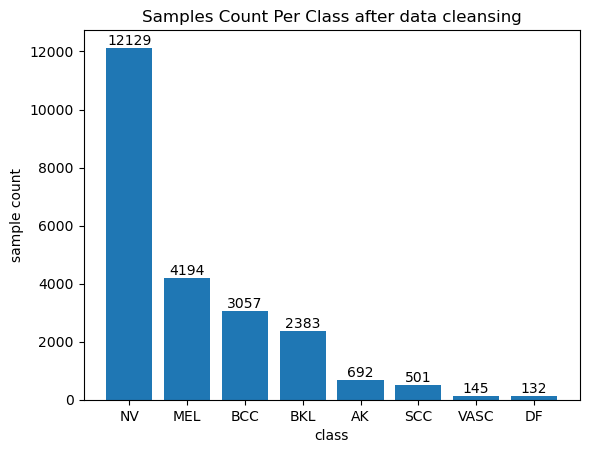

In [9]:
# visualization of classes images count

x = df_out['label'].value_counts()
print(x.values)
print(x.index)
fig, ax = plt.subplots()
plt.bar(x.index, x.values, width=0.8)
plt.title('Samples Count Per Class after data cleansing')
plt.xlabel('class')
plt.ylabel('sample count')
plt.bar_label(ax.containers[0], labels=x.values)
plt.show()

In [10]:
# recalculate the class weight

def get_weight(df):
    # print('evaluate folder ', path)
    dict_counts = dict(df['label'].value_counts())
    labels = list(dict_counts.keys())
    num_class = len(labels)
    print(num_class,'classes found')
    print(labels)
    print('\nclass',':' ,'files')
    print(df['label'].value_counts())
    total = sum(dict_counts.values())
    dict_weights = {}
    print('\nclass',':' ,'weight')
    for label in labels:
        value = round(total/(num_class*dict_counts[label]), 5)
        key = dict_classes[label]
        dict_weights[key]=value
        print(label,'-> ',key,':',value)
    return dict_weights

# adding column name to the respective columns
df_out.columns =['path', 'label', 'bin']
#dict_classes={'AK':0,'BCC':1,'BKL':2,'DF':3,'NV':4,'VASC':5,'MEL':6,'SCC':7}
classes=df_out['label'].unique()
dict_counts = dict(df_out['label'].value_counts()) 
#['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF']
dict_weights = get_weight(df_out)
print(dict_weights)


8 classes found
['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF']

class : files
NV      12129
MEL      4194
BCC      3057
BKL      2383
AK        692
SCC       501
VASC      145
DF        132
Name: label, dtype: int64

class : weight
NV ->  5 : 0.23944
MEL ->  4 : 0.69245
BCC ->  1 : 0.94999
BKL ->  2 : 1.21868
AK ->  0 : 4.19671
SCC ->  6 : 5.79666
VASC ->  7 : 20.02845
DF ->  3 : 22.00095
{5: 0.23944, 4: 0.69245, 1: 0.94999, 2: 1.21868, 0: 4.19671, 6: 5.79666, 7: 20.02845, 3: 22.00095}


In [11]:
# split training set into train and test (keeping classes ratio)

def stratified_split(df, test_ratio, seed=4):
  data_train = df['path']
  class_train = df['bin']
  X_train, X_test, y_train, y_test = train_test_split(data_train, class_train, test_size=test_ratio, random_state=seed, stratify=class_train)
  return X_train, X_test, y_train, y_test

test_ratio=0.2
X_train, X_val, Y_train, Y_val = stratified_split(df_out, test_ratio)
X_train.shape, X_val.shape

((18586,), (4647,))

In [12]:
# init training and validating data sets

batch_size = 32
img_h = 84
img_w = 84

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.map(img_decoder, num_parallel_calls=AUTO)
	# .map(partial(process_data), num_parallel_calls=AUTO)
	.batch(batch_size)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.map(img_decoder, num_parallel_calls=AUTO)
	.batch(batch_size)
	.prefetch(AUTO)
)


In [13]:
print(len(val_ds))
print(len(train_ds))
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
class_names=list(dict_counts.keys())
num_classes = len(class_names)
print(class_names)
print(num_classes)

146
581
(32, 84, 84, 3)
(32,)
['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF']
8


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 71: invalid start byte

In [ ]:
# class_names=list(dict_counts.keys())
# num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 84, 84, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 42, 42, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)       

In [ ]:
epochs=10
history = model.fit(train_ds,
					validation_data=val_ds,
					epochs=epochs,
					verbose=1)

Epoch 1/10
581/581 [==============================] - 39s 67ms/step - loss: 1.4124 - accuracy: 0.5206 - val_loss: 1.3345 - val_accuracy: 0.5242
Epoch 2/10
581/581 [==============================] - 16s 27ms/step - loss: 1.2556 - accuracy: 0.5524 - val_loss: 1.2138 - val_accuracy: 0.5556
Epoch 3/10
581/581 [==============================] - 16s 28ms/step - loss: 1.1978 - accuracy: 0.5690 - val_loss: 1.1830 - val_accuracy: 0.5724
Epoch 4/10
581/581 [==============================] - 16s 28ms/step - loss: 1.1629 - accuracy: 0.5868 - val_loss: 1.1519 - val_accuracy: 0.5886
Epoch 5/10
581/581 [==============================] - 17s 29ms/step - loss: 1.1305 - accuracy: 0.5986 - val_loss: 1.1096 - val_accuracy: 0.6053
Epoch 6/10
581/581 [==============================] - 17s 29ms/step - loss: 1.1001 - accuracy: 0.6104 - val_loss: 1.0787 - val_accuracy: 0.6176
Epoch 7/10
581/581 [==============================] - 18s 30ms/step - loss: 1.0709 - accuracy: 0.6237 - val_loss: 1.0691 - val_accuracy:

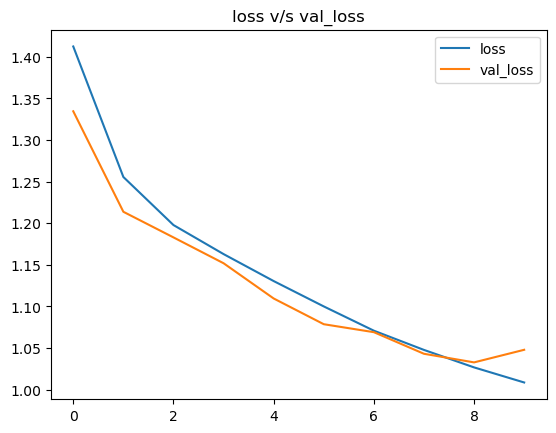

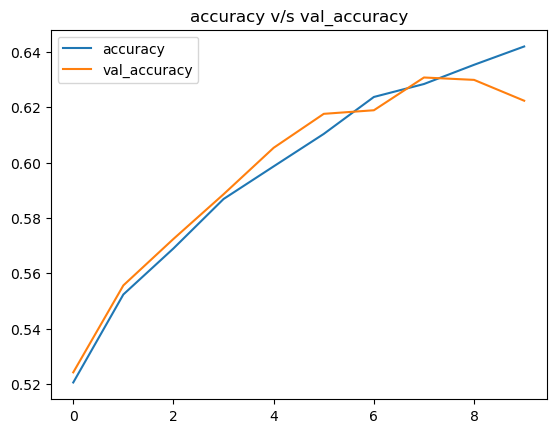

In [ ]:
import matplotlib.pyplot as plt

def plot_result(history_):
    hist_df = pd.DataFrame(history_.history)
    # hist_df.head()
    keys=list(hist_df.columns)

    hist_df[keys[0]].plot()
    hist_df[keys[2]].plot()
    plt.title(keys[0]+' v/s '+keys[2])
    plt.legend()
    plt.show()

    hist_df[keys[1]].plot()
    hist_df[keys[3]].plot()
    plt.title(keys[1]+' v/s '+keys[3])
    plt.legend()
    plt.show()

plot_result(history)

In [ ]:
wt_model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

wt_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

wt_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 84, 84, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 84, 84, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)       

In [ ]:
epochs=10
wt_history = wt_model.fit(train_ds,
					validation_data=val_ds,
					epochs=epochs,
     				class_weight=dict_weights,
					verbose=1)

Epoch 1/10
581/581 [==============================] - 17s 29ms/step - loss: 2.0811 - accuracy: 0.0524 - val_loss: 2.0771 - val_accuracy: 0.1805
Epoch 2/10
581/581 [==============================] - 15s 27ms/step - loss: 2.0811 - accuracy: 0.1031 - val_loss: 2.0762 - val_accuracy: 0.5221
Epoch 3/10
581/581 [==============================] - 16s 28ms/step - loss: 2.0811 - accuracy: 0.1455 - val_loss: 2.0793 - val_accuracy: 0.0056
Epoch 4/10
581/581 [==============================] - 17s 29ms/step - loss: 2.0812 - accuracy: 0.0470 - val_loss: 2.0790 - val_accuracy: 0.1026
Epoch 5/10
581/581 [==============================] - 16s 28ms/step - loss: 2.0811 - accuracy: 0.0626 - val_loss: 2.0796 - val_accuracy: 0.1026
Epoch 6/10
581/581 [==============================] - 18s 31ms/step - loss: 2.0811 - accuracy: 0.2502 - val_loss: 2.0816 - val_accuracy: 0.0297
Epoch 7/10
581/581 [==============================] - 18s 31ms/step - loss: 2.0811 - accuracy: 0.0223 - val_loss: 2.0788 - val_accuracy:

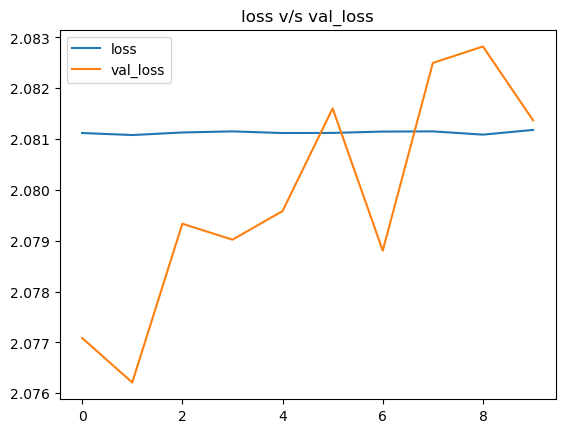

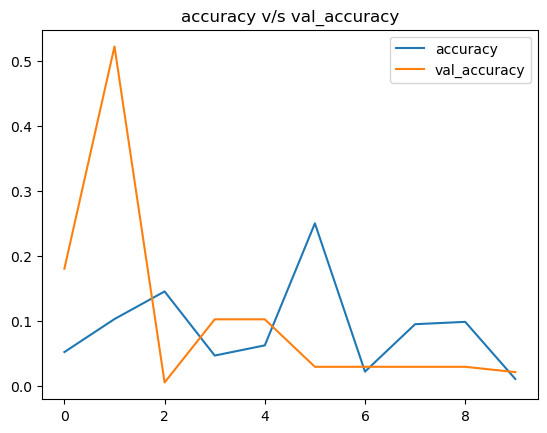

In [ ]:

plot_result(wt_history)

In [ ]:
from keras.applications.efficientnet import EfficientNetB7

pre_trained_model = EfficientNetB7(
	input_shape=(84, 84, 3),
	weights='imagenet',
	include_top=False
)

for layer in pre_trained_model.layers:
	layer.trainable = False



In [ ]:
from keras import Model

# inputs = layers.Input(shape=(224, 224, 3))
inputs = layers.Input(shape=(84, 84, 3))
x = layers.Flatten()(inputs)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

new_model = Model(inputs, outputs)


In [ ]:
new_model.compile(
	loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
	optimizer='adam',
	metrics=['AUC']
)


In [ ]:
epochs=10
history = new_model.fit(train_ds,
					validation_data=val_ds,
					epochs=epochs,
					verbose=1)


Epoch 1/10
581/581 [==============================] - 11s 17ms/step - loss: -180.3290 - auc: 0.6696 - val_loss: -227.3198 - val_auc: 0.7442
Epoch 2/10
581/581 [==============================] - 10s 17ms/step - loss: -1423.7015 - auc: 0.6152 - val_loss: -3339.4348 - val_auc: 0.5170
Epoch 3/10
581/581 [==============================] - 13s 23ms/step - loss: -3811.1416 - auc: 0.5809 - val_loss: -5480.5269 - val_auc: 0.6208
Epoch 4/10
581/581 [==============================] - 10s 17ms/step - loss: -7144.4087 - auc: 0.5719 - val_loss: -6776.8442 - val_auc: 0.6133
Epoch 5/10
581/581 [==============================] - 10s 17ms/step - loss: -11260.2246 - auc: 0.5609 - val_loss: -19649.6328 - val_auc: 0.5629
Epoch 6/10
581/581 [==============================] - 10s 17ms/step - loss: -16138.0068 - auc: 0.5629 - val_loss: -22505.3516 - val_auc: 0.5683
Epoch 7/10
581/581 [==============================] - 10s 17ms/step - loss: -21774.6055 - auc: 0.5506 - val_loss: -19254.1504 - val_auc: 0.5060
Ep

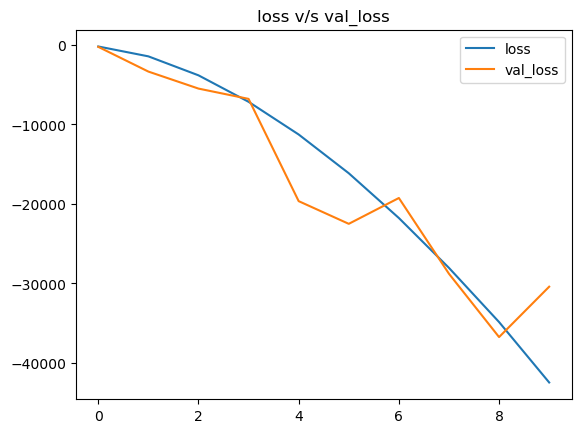

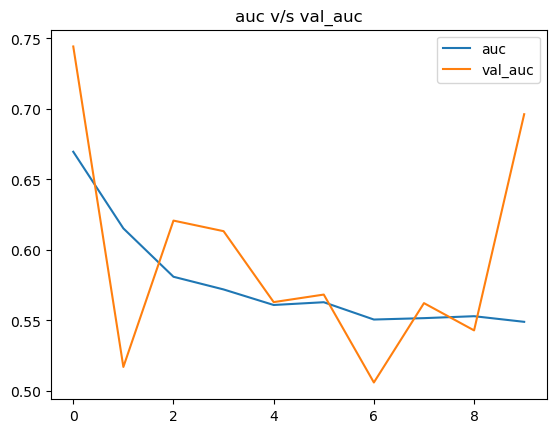

In [ ]:
plot_result(history)


In [ ]:
wt_model = Model(inputs, outputs)
wt_model.compile(
	loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
	optimizer='adam',
	metrics=['AUC']
)

In [ ]:
epochs=10
wt_history = wt_model.fit(train_ds,
					validation_data=val_ds,
					epochs=epochs,
          			class_weight=dict_weights,
					verbose=1)


Epoch 1/10
581/581 [==============================] - 12s 19ms/step - loss: -41589.8672 - auc: 0.5145 - val_loss: -26304.4102 - val_auc: 0.4795
Epoch 2/10
581/581 [==============================] - 13s 23ms/step - loss: -53886.0547 - auc: 0.4986 - val_loss: -25270.8047 - val_auc: 0.4637
Epoch 3/10
581/581 [==============================] - 11s 19ms/step - loss: -63480.7344 - auc: 0.4993 - val_loss: -81802.2500 - val_auc: 0.4999
Epoch 4/10
581/581 [==============================] - 11s 20ms/step - loss: -72292.1484 - auc: 0.4997 - val_loss: -65750.5625 - val_auc: 0.4997
Epoch 5/10
581/581 [==============================] - 11s 18ms/step - loss: -81021.4453 - auc: 0.4999 - val_loss: -62107.8477 - val_auc: 0.5000
Epoch 6/10
581/581 [==============================] - 9s 16ms/step - loss: -83996.7891 - auc: 0.4995 - val_loss: -68204.0312 - val_auc: 0.4972
Epoch 7/10
581/581 [==============================] - 9s 16ms/step - loss: -95341.3047 - auc: 0.4998 - val_loss: -83404.2891 - val_auc: 0

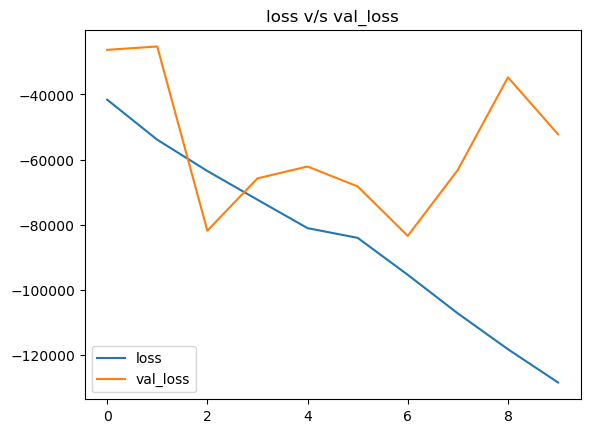

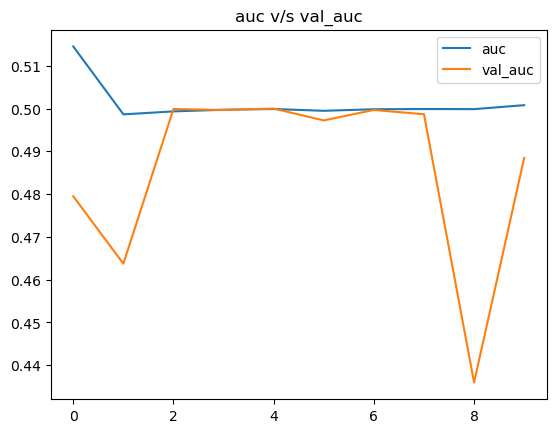

In [ ]:
plot_result(wt_history)
